In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

Results already exist
PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
(462, 267)


/home/mmazeem/dev/protein-dihedral-visualization/lib/plotting.py:251: RuntimeWarning: Mean of empty slice
  X = np.where(np.isnan(X), np.nanmean(X,axis=0), X)


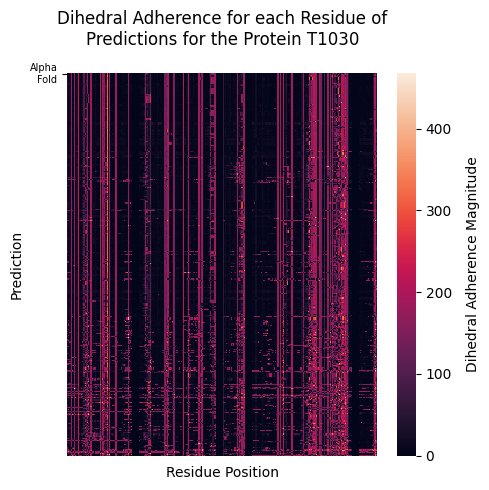

In [16]:
WINDOW_SIZE = 4
WINDOW_SIZE_CONTEXT = 5
WINDOW_SIZE_CONTEXT2 = 6
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'
casp_protein_id = 'T1030'   # 6ya2

da = DihedralAdherence(casp_protein_id, [4,5,6], PDBMINE_URL, PROJECT_DIR, kdews=[1,64,128])
# da.compute_structures()
# da.load_results()
# da.query_pdbmine()
# da.compute_das(replace=True)
da.load_results_da()
da.plot_heatmap()
# pdbmine = PDBMineQuery(casp_protein_id, da.pdb_code, WINDOW_SIZE, PDBMINE_URL, da.sequence, 1)
# phi_psi_mined = pdbmine.query_and_process_pdbmine()


In [111]:
from Bio.PDB import PDBParser
from lib.constants import AMINO_ACID_CODES
structure = PDBParser().get_structure('6poo', 'pdb/pdb6poo.ent')
structure.atom_to_internal_coordinates()
seq = ''.join([AMINO_ACID_CODES.get(r.resname, 'X') for r in structure.get_residues()])
seq.find('WTGQS')
# names = [AMINO_ACID_CODES.get(r.resname, 'X') for r in list(structure.get_residues())[152:152+5]]
list(structure.get_residues())[239+2].internal_coord.get_angle('phi')

55.99937674099932

In [63]:
for protein in Path('tests').iterdir():
    casp_id = protein.name.split('_')[0]
    da = DihedralAdherence(casp_id, WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR)
    da.load_results()
    da.compute_mds(replace=True)

Results already exist
PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
0/393: KEFWNL - win5: 56, win6: 0
(1, 2) (484, 2) (56, 3) (0, 3)
1/393: EFWNLD - win5: 19, win6: 0
(1, 2) (484, 2) (19, 3) (0, 3)
2/393: FWNLDK - win5: 8, win6: 0
(1, 2) (484, 2) (8, 3) (0, 3)
3/393: WNLDKN - win5: 23, win6: 0
(1, 2) (484, 2) (23, 3) (0, 3)
4/393: NLDKNL - win5: 39, win6: 8
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (39, 3) (8, 3)
5/393: LDKNLQ - win5: 106, win6: 6
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (106, 3) (6, 3)
6/393: DKNLQL - win5: 30, win6: 0
(1, 2) (484, 2) (30, 3) (0, 3)
7/393: KNLQLR - win5: 149, win6: 24
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (149, 3) (24, 3)
8/393: NLQLRL - win5: 134, win6: 0
(1, 2) (484, 2) (134, 3) (0, 3)
9/393: LQLRLG - win5: 170, win6: 3
	Enough context data for KDE - Using Full Context
(1, 2) (484, 2) (170, 3) (3, 3)
10/393: QLRLGI - win5: 48, win6: 2
(1, 2) (484, 2) (48, 3) (2, 3)
11/393:

In [ ]:
targetlist = pd.read_csv('targetlist.csv', sep=';')
for target in targetlist.Target.unique():
    try:
        da = DihedralAdherence(target, WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, PROJECT_DIR)
    except ValueError as e:
        print(f'Skipping {target}: {e}')
    da.compute_structures()
    da.query_pdbmine()
    da.compute_mds()

In [17]:
from lib.fit_model_on_multiple import fit_lr, plot_md_vs_rmsd
import os
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

# model, grouped_preds = fit_model_on_multiple(['T1056', 'T1038', 'T1025', 'T1028'], WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, n_comp=2000)
model, grouped_preds = fit_lr(
    ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028'], 
    [4,5,6,7], [1,32,64,128],
    PDBMINE_URL, PROJECT_DIR,
    n_comp=2000,
)
plot_md_vs_rmsd(grouped_preds)

PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
Computing phi-psi for xray
Computing phi-psi for predictions


0it [00:00, ?it/s]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
1it [00:01,  1.14s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarn

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
4it [00:04,  1.09s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-pack

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.war

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.war

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
78it [01:22,  1.10s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: I

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
100it [01:44,  1.04it/s]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
138it [02:25,  1.08s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: 

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
142it [02:29,  1.09s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
192it [03:25,  1.09s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
256it [04:36,  1.12s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
265it [04:46,  1.10s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
319it [05:47,  1.21s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.war

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
349it [06:20,  1.08s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
353it [06:25,  1.17s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
369it [06:43,  1.04s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
374it [06:48,  1.13s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
378it [06:53,  1.07s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.war

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
419it [07:41,  1.16s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.war

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
460it [08:27,  1.17s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
466it [08:34,  1.11s/it]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Failed to rebuild


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or residues may be missing in the data structure.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 4
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 3182
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:388: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3183
  warnings.warn(
487it [08:57,  1.02it/s]/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/PDBParser.py:409: PDBConstructionWarning: PDBConstructionException: Invalid or missing model serial number at line 3.
Exception ignored.
Some atoms or

Querying PDBMine - 4


  0%|          | 0/5 [00:00<?, ?it/s]

{'status': 'Running', 'queryID': 'b0b5d658-1b08-11ef-a083-0242ac110002'}
